In [2]:
# Import pustaka
import pandas as pd
from IPython.display import display, HTML, Markdown
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Baca file CSV
csv_filename = '../Data/landmarks_with_labels.csv'
df = pd.read_csv(csv_filename)

# Tampilkan beberapa data awal
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)       # Hindari pemotongan baris
pd.set_option('display.max_colwidth', None)



df.head(10) # menampilkan 5 data pertama
# df.describe()
# df.info()

x1        y1            z1        x2        y2        z2        x3  \
0  0.416470  0.858214 -1.390933e-06  0.567269  0.788223 -0.048259  0.650500   
1  0.425479  0.827812 -1.314731e-06  0.556025  0.734161 -0.041572  0.593248   
2  0.433940  0.840489 -9.561533e-07  0.584570  0.811335 -0.052229  0.713915   
3  0.424752  0.859938 -1.127896e-06  0.563686  0.770378 -0.036799  0.634127   
4  0.435549  0.832781 -1.324019e-06  0.578794  0.743999 -0.044112  0.647564   
5  0.408985  0.797948 -1.277659e-06  0.552081  0.748509 -0.046842  0.631690   
6  0.511844  0.853598 -1.111535e-06  0.663565  0.782382 -0.039806  0.747280   
7  0.642006  0.879482 -9.239740e-07  0.791948  0.833991 -0.045851  0.888613   
8  0.375456  0.891353 -1.292513e-06  0.519527  0.782120 -0.047365  0.585070   
9  0.421318  0.868679 -1.247993e-06  0.589490  0.795925 -0.042328  0.688305   

         y3        z3        x4        y4        z4        x5        y5  \
0  0.599738 -0.044068  0.651343  0.434335 -0.037716  0.630207  0.329777   
1  0.540157 -0.035926  0.555203  0.386012 -0.029681  0.508215  0.291744   
2  0.650774 -0.051743  0.752738  0.491819 -0.046711  0.765584  0.387773   
3  0.604066 -0.033227  0.627482  0.462224 -0.031053  0.606944  0.363975   
4  0.544591 -0.039700  0.635233  0.379235 -0.034998  0.619872  0.270396   
5  0.545608 -0.043486  0.630831  0.374406 -0.034026  0.655163  0.280925   
6  0.609631 -0.036672  0.739359  0.451405 -0.032250  0.746283  0.348014   
7  0.664413 -0.043856  0.891995  0.504104 -0.038351  0.902129  0.403079   
8  0.596929 -0.047512  0.572726  0.439227 -0.047925  0.562405  0.330855   
9  0.623787 -0.038715  0.692192  0.460812 -0.035383  0.701661  0.350515   

         z5        x6        y6        z6        x7        y7        z7  \
0 -0.016875  0.553834  0.492865  0.010513  0.537937  0.378965 -0.053486   
1 -0.012000  0.473518  0.460537  0.013398  0.433423  0.352079 -0.049334   
2 -0.027136  0.637154  0.525178 -0.002157  0.661114  0.422494 -0.056711   
3 -0.017289  0.531248  0.515754  0.021120  0.528318  0.408769 -0.036392   
4 -0.014940  0.540223  0.434891  0.010270  0.536017  0.322444 -0.050443   
5 -0.009864  0.536219  0.453781 -0.009293  0.528306  0.343794 -0.062815   
6 -0.013821  0.640774  0.499227  0.000220  0.656312  0.392770 -0.051709   
7 -0.019440  0.797506  0.547595 -0.004523  0.815868  0.444237 -0.054224   
8 -0.033565  0.470369  0.506937  0.020870  0.468345  0.392138 -0.041369   
9 -0.018093  0.586542  0.502357  0.014245  0.607505  0.392973 -0.044809   

         x8        y8        z8        x9        y9        z9       x10  \
0  0.538586  0.503520 -0.075627  0.542549  0.558441 -0.077766  0.463860   
1  0.458677  0.463952 -0.072516  0.477161  0.529003 -0.072950  0.387769   
2  0.629369  0.536893 -0.074206  0.614855  0.572589 -0.078089  0.550016   
3  0.532588  0.518992 -0.058158  0.530998  0.571794 -0.061012  0.452184   
4  0.543042  0.456249 -0.067523  0.538959  0.500590 -0.068730  0.450383   
5  0.525404  0.469178 -0.075248  0.524722  0.512087 -0.075928  0.443371   
6  0.658523  0.514946 -0.059203  0.642621  0.560157 -0.054343  0.553933   
7  0.806523  0.561542 -0.064853  0.791024  0.607245 -0.063438  0.709439   
8  0.480308  0.522959 -0.061463  0.477049  0.573662 -0.063624  0.382975   
9  0.602201  0.518333 -0.059760  0.584771  0.567871 -0.058308  0.498803   

        y10       z10       x11       y11       z11       x12       y12  \
0  0.504003  0.015158  0.450343  0.399572 -0.063058  0.468709  0.544615   
1  0.491126  0.016963  0.351213  0.388520 -0.055486  0.397081  0.520661   
2  0.516226  0.003806  0.570578  0.410091 -0.064579  0.554863  0.552986   
3  0.527593  0.019825  0.451384  0.422368 -0.050864  0.468725  0.554760   
4  0.452506  0.009756  0.446491  0.347823 -0.066393  0.471948  0.502840   
5  0.471477 -0.002337  0.434925  0.358488 -0.073276  0.453851  0.506157   
6  0.513190 -0.000788  0.572434  0.408852 -0.066928  0.589741  0.560265   
7  0.552395 -0.001308  0.727471  0.449568 -0.061704  0.735113

In [3]:
html = df.to_html()
display(HTML(f'<div style="height:400px; overflow:auto; border:1px solid #ccc">{html}</div>'))

In [7]:
import os

DATASET_PATH = "../Dataset-jari/SIBI"

for label in os.listdir(DATASET_PATH):
    count = len(os.listdir(os.path.join(DATASET_PATH, label)))
    print(f"{label}: {count} images")

A: 220 images
B: 220 images
C: 220 images
D: 220 images
E: 220 images
F: 220 images
G: 220 images
H: 220 images
I: 220 images
K: 220 images
L: 220 images
M: 220 images
N: 220 images
O: 220 images
P: 220 images
Q: 220 images
R: 220 images
S: 220 images
T: 220 images
U: 220 images
V: 220 images
W: 220 images
X: 220 images
Y: 220 images


16/16 [==============================] - 0s 3ms/step
Accuracy: 0.9593

Classification Report:


```
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        23
           B       0.97      1.00      0.98        29
           C       1.00      0.92      0.96        13
           D       0.89      1.00      0.94        24
           E       0.97      1.00      0.98        32
           F       1.00      1.00      1.00        23
           G       1.00      0.91      0.95        22
           H       1.00      1.00      1.00        18
           I       1.00      1.00      1.00        20
           K       1.00      0.96      0.98        26
           L       0.95      1.00      0.97        18
           M       1.00      1.00      1.00        20
           N       1.00      1.00      1.00        20
           O       0.94      1.00      0.97        16
           P       0.61      1.00      0.76        14
           Q       1.00      0.33      0.50        12
           R       1.00      1.00      1.00        13
           S       1.00      0.93      0.96        28
           T       0.93      1.00      0.96        25
           U       1.00      1.00      1.00        15
           V       0.92      1.00      0.96        22
           W       1.00      0.88      0.93        16
           X       1.00      0.88      0.93        24
           Y       1.00      0.95      0.97        19

    accuracy                           0.96       492
   macro avg       0.97      0.95      0.95       492
weighted avg       0.97      0.96      0.96       492

```

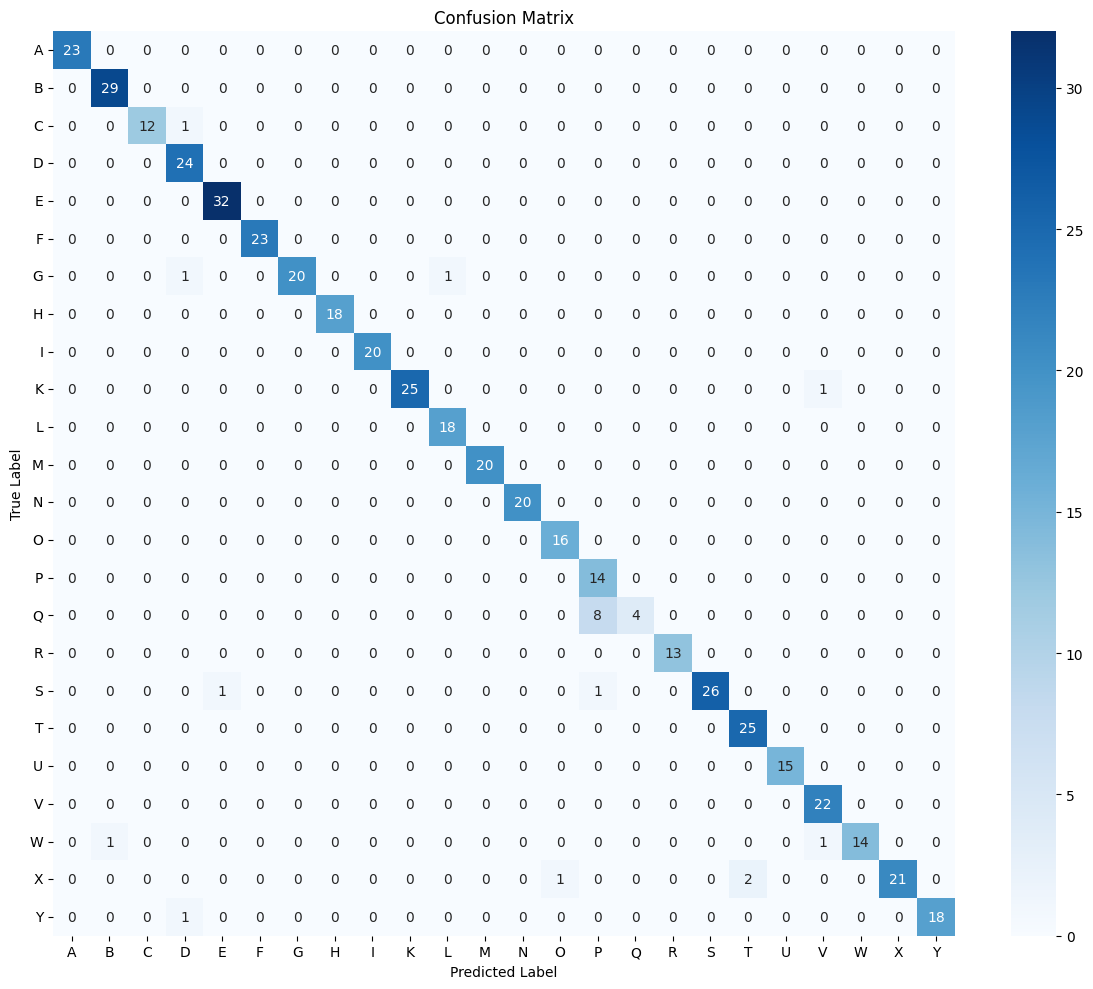

In [12]:
import sys

# Load data dan label
X = np.load("../Data/landmarks.npy")
y = np.load("../Data/labels.npy")

np.set_printoptions(threshold=sys.maxsize)

# Split data (pastikan sesuai dengan saat training!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load model
from tensorflow.keras.models import load_model
model = load_model("../Models/model_landmarksV3.4.h5")

# Prediksi
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- Evaluasi ---
# 1. Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 2. Classification Report
huruf_labels = [chr(i) for i in range(ord('A'), ord('Z')) if i not in [ ord('J'), ord('Z')]]
print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# y_true dan y_pred adalah label asli dan prediksi dari model
report = classification_report(y_test, y_pred, target_names=huruf_labels, zero_division=0)
# print(report)
# with open("classification_report.txt", "w") as f :
#     f.write(report)
# print("Laporan klasifikasi berhasil disimpan ke dalam classification_report.txt")
# with open('classification_report.txt', 'r') as f:
#     print(f.read())

display(Markdown(f"```\n{report}\n```"))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            
            xticklabels=huruf_labels, 
            yticklabels=huruf_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
print(len(huruf_labels))  # Harusnya 24


24
